In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Unified Projects/CloudWatch_Traffic_Web_Attack.csv')

In [ ]:
df.head()

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


Data Cleaning and Wrangling

In [ ]:
df.isnull().sum()

,0
bytes_in,0
bytes_out,0
creation_time,0
end_time,0
src_ip,0
src_ip_country_code,0
protocol,0
response.code,0
dst_port,0
dst_ip,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [ ]:
df.shape

(282, 16)

In [ ]:
df.describe(include='all')

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
count,2.820000e+02,2.820000e+02,282,282,282,282,282,282.0,282.0,282,282,282,282,282,282,282
unique,NaN,NaN,30,30,28,7,1,NaN,NaN,1,1,1,1,1,30,1
top,NaN,NaN,2024-04-26T09:00:00Z,2024-04-26T09:10:00Z,165.225.209.4,US,HTTPS,NaN,NaN,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:00:00Z,waf_rule
freq,NaN,NaN,17,17,29,113,282,NaN,NaN,282,282,282,282,282,17,282
mean,1.199390e+06,8.455429e+04,NaN,NaN,NaN,NaN,NaN,200.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.149312e+06,2.549279e+05,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.000000e+01,4.400000e+01,NaN,NaN,NaN,NaN,NaN,200.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.381500e+03,1.114200e+04,NaN,NaN,NaN,NaN,NaN,200.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.318200e+04,1.379950e+04,NaN,NaN,NaN,NaN,NaN,200.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.083300e+04,2.627950e+04,NaN,NaN,NaN,NaN,NaN,200.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['creation_time'].unique()

array(['2024-04-25T23:00:00Z', '2024-04-25T23:10:00Z',
       '2024-04-25T23:20:00Z', '2024-04-25T23:30:00Z',
       '2024-04-25T23:40:00Z', '2024-04-25T23:50:00Z',
       '2024-04-26T00:00:00Z', '2024-04-26T00:10:00Z',
       '2024-04-26T00:20:00Z', '2024-04-26T00:30:00Z',
       '2024-04-26T00:40:00Z', '2024-04-26T00:50:00Z',
       '2024-04-26T01:00:00Z', '2024-04-26T01:10:00Z',
       '2024-04-26T01:20:00Z', '2024-04-26T01:30:00Z',
       '2024-04-26T01:40:00Z', '2024-04-26T01:50:00Z',
       '2024-04-26T08:00:00Z', '2024-04-26T08:10:00Z',
       '2024-04-26T08:20:00Z', '2024-04-26T08:30:00Z',
       '2024-04-26T08:40:00Z', '2024-04-26T08:50:00Z',
       '2024-04-26T09:10:00Z', '2024-04-26T09:00:00Z',
       '2024-04-26T09:20:00Z', '2024-04-26T09:30:00Z',
       '2024-04-26T09:40:00Z', '2024-04-26T09:50:00Z'], dtype=object)

In [ ]:
df['end_time'].unique()

array(['2024-04-25T23:10:00Z', '2024-04-25T23:20:00Z',
       '2024-04-25T23:30:00Z', '2024-04-25T23:40:00Z',
       '2024-04-25T23:50:00Z', '2024-04-26T00:00:00Z',
       '2024-04-26T00:10:00Z', '2024-04-26T00:20:00Z',
       '2024-04-26T00:30:00Z', '2024-04-26T00:40:00Z',
       '2024-04-26T00:50:00Z', '2024-04-26T01:00:00Z',
       '2024-04-26T01:10:00Z', '2024-04-26T01:20:00Z',
       '2024-04-26T01:30:00Z', '2024-04-26T01:40:00Z',
       '2024-04-26T01:50:00Z', '2024-04-26T02:00:00Z',
       '2024-04-26T08:10:00Z', '2024-04-26T08:20:00Z',
       '2024-04-26T08:30:00Z', '2024-04-26T08:40:00Z',
       '2024-04-26T08:50:00Z', '2024-04-26T09:00:00Z',
       '2024-04-26T09:20:00Z', '2024-04-26T09:10:00Z',
       '2024-04-26T09:30:00Z', '2024-04-26T09:40:00Z',
       '2024-04-26T09:50:00Z', '2024-04-26T10:00:00Z'], dtype=object)

In [ ]:
# Selecting numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Detecting outliers using IQR
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outlier_count': len(outliers),
        'percentage': len(outliers) / len(df) * 100
    }

# Print the summary
for col, stats in outlier_summary.items():
    print(f"\n📊 Column: {col}")
    print(f"  Outliers: {stats['outlier_count']} ({stats['percentage']:.2f}%)")
    print(f"  Lower Bound: {stats['lower_bound']}")
    print(f"  Upper Bound: {stats['upper_bound']}")


📊 Column: bytes_in
  Outliers: 40 (14.18%)
  Lower Bound: -32795.75
  Upper Bound: 69010.25

📊 Column: bytes_out
  Outliers: 37 (13.12%)
  Lower Bound: -11564.25
  Upper Bound: 48985.75

📊 Column: response.code
  Outliers: 0 (0.00%)
  Lower Bound: 200.0
  Upper Bound: 200.0

📊 Column: dst_port
  Outliers: 0 (0.00%)
  Lower Bound: 443.0
  Upper Bound: 443.0


In [ ]:
df.head(10)

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
5,3906,3488,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
6,17748,29208,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
7,4767917,291520,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
8,10538,15514,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
9,9656,6380,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.131.1,AT,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [ ]:
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['time'] = pd.to_datetime(df['time'])


In [ ]:
df.head(10)

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
5,3906,3488,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
6,17748,29208,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
7,4767917,291520,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
8,10538,15514,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
9,9656,6380,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.131.1,AT,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule


In [ ]:
df['src_ip_country_code'] = df['src_ip_country_code'].str.upper()
df.head(10)

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
5,3906,3488,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
6,17748,29208,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
7,4767917,291520,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
8,10538,15514,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule
9,9656,6380,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.131.1,AT,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule


In [ ]:
df['session_duration'] = (df['end_time'] - df['creation_time']).dt.total_seconds()
df['avg_packet_size'] = (df['bytes_in'] + df['bytes_out']) / df['session_duration']


EDA

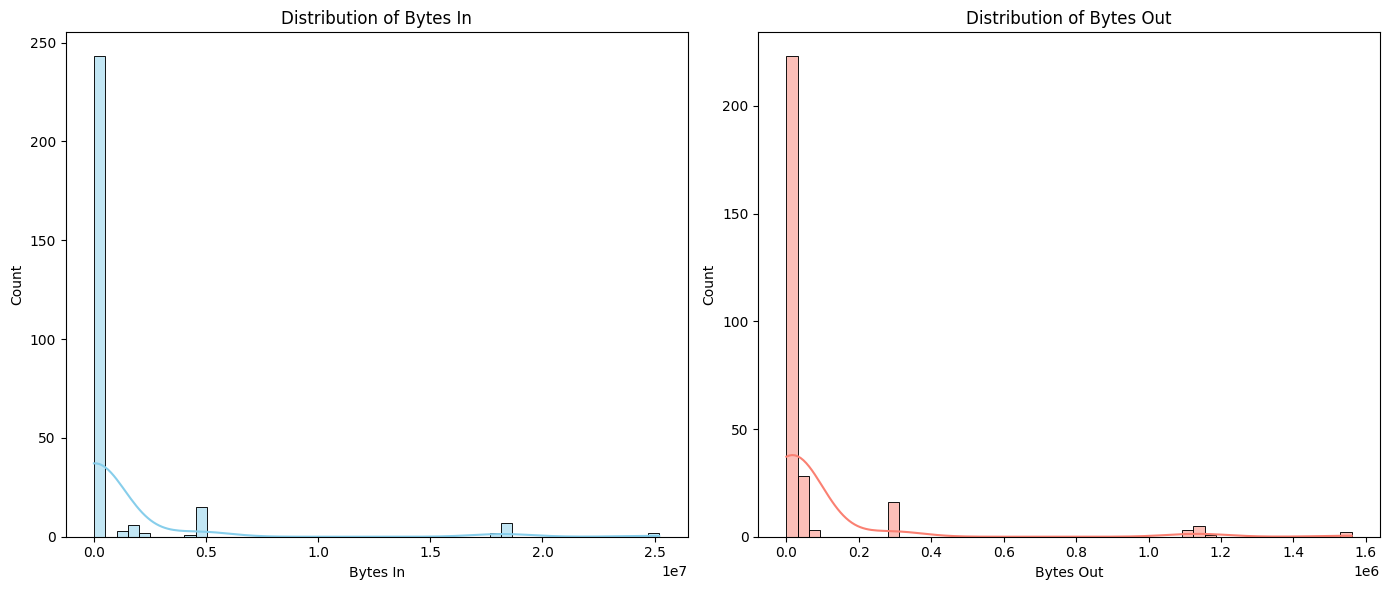

In [ ]:
plt.figure(figsize=(14, 6))
# bytes_in distribution
plt.subplot(1, 2, 1)
sns.histplot(df['bytes_in'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Bytes In')
plt.xlabel('Bytes In')
# bytes_out distribution
plt.subplot(1, 2, 2)
sns.histplot(df['bytes_out'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Bytes Out')
plt.xlabel('Bytes Out')
plt.tight_layout()
plt.show()

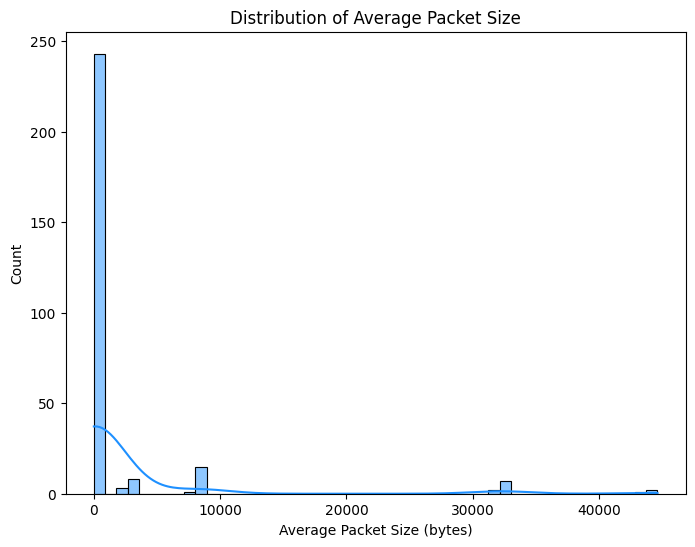

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['avg_packet_size'], bins=50, kde=True, color='dodgerblue')
plt.title('Distribution of Average Packet Size')
plt.xlabel('Average Packet Size (bytes)')
plt.ylabel('Count')
plt.show()


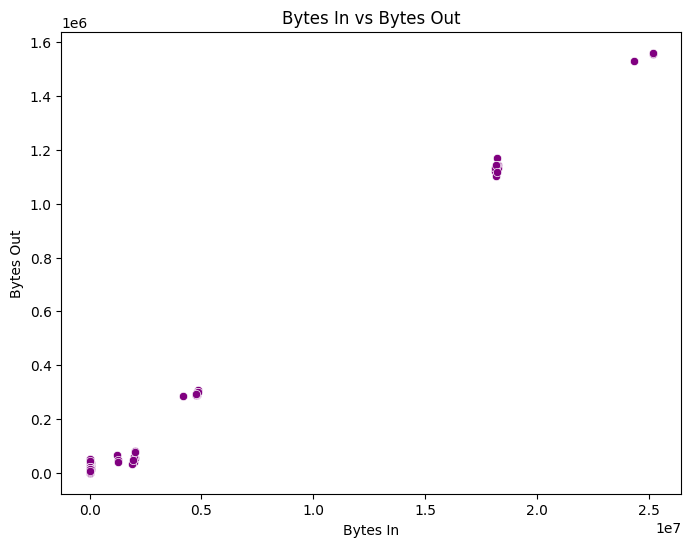

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bytes_in', y='bytes_out', data=df, color='purple')
plt.title('Bytes In vs Bytes Out')
plt.xlabel('Bytes In')
plt.ylabel('Bytes Out')
plt.show()


In [ ]:
df['hour_of_day'] = df['time'].dt.hour


<ipython-input-21-c1b652961d3f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour_of_day', data=df, palette="crest")


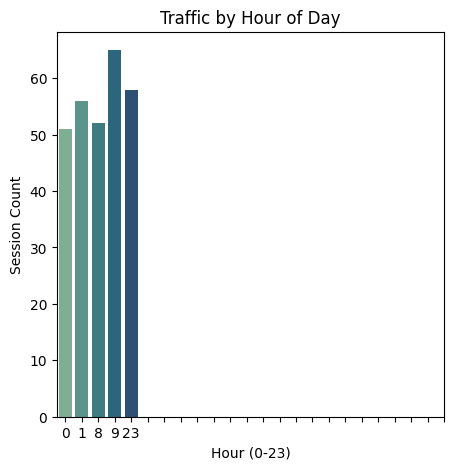

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x='hour_of_day', data=df, palette="crest")
plt.title('Traffic by Hour of Day')
plt.xlabel('Hour (0-23)')
plt.ylabel('Session Count')
plt.xticks(range(24))
plt.show()

In [ ]:
df['hour_of_day'].unique()

array([23,  0,  1,  8,  9], dtype=int32)

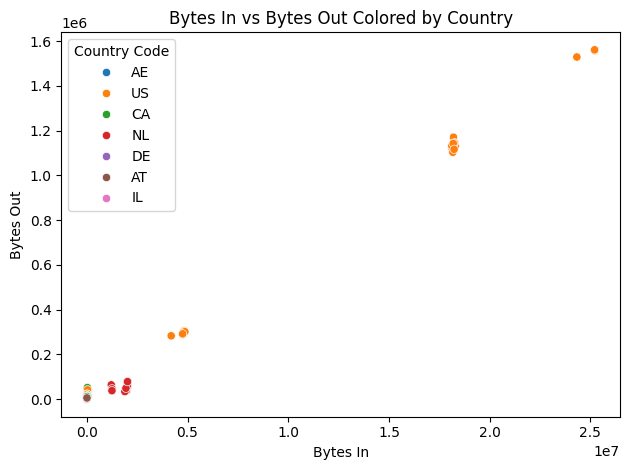

In [ ]:
sns.scatterplot(data=df, x='bytes_in', y='bytes_out', hue='src_ip_country_code')
plt.title('Bytes In vs Bytes Out Colored by Country')
plt.xlabel('Bytes In')
plt.ylabel('Bytes Out')
plt.legend(title='Country Code')
plt.tight_layout()
plt.show()


<ipython-input-24-61d2b5305534>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ips.values, y=top_ips.index, palette='viridis')


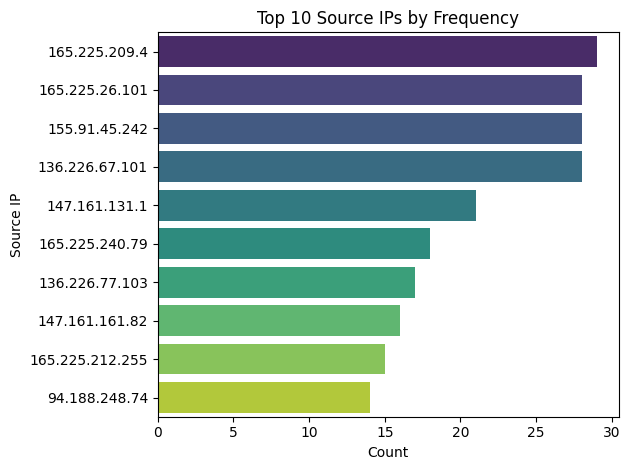

In [ ]:
top_ips = df['src_ip'].value_counts().head(10)
sns.barplot(x=top_ips.values, y=top_ips.index, palette='viridis')
plt.title('Top 10 Source IPs by Frequency')
plt.xlabel('Count')
plt.ylabel('Source IP')
plt.tight_layout()
plt.show()

<ipython-input-25-5bedf0a52d85>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='src_ip_country_code', data=df, order=df['src_ip_country_code'].value_counts().index, palette='coolwarm')


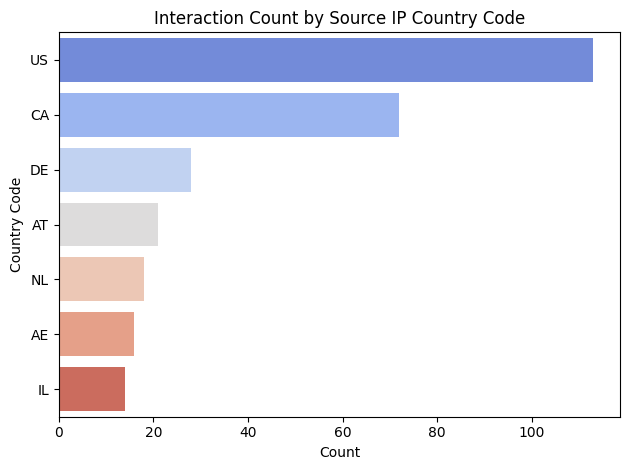

In [ ]:
sns.countplot(y='src_ip_country_code', data=df, order=df['src_ip_country_code'].value_counts().index, palette='coolwarm')
plt.title('Interaction Count by Source IP Country Code')
plt.xlabel('Count')
plt.ylabel('Country Code')
plt.tight_layout()
plt.show()

<ipython-input-26-2bd4c278e031>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='src_ip_country_code', y='avg_packet_size',palette='Set2')


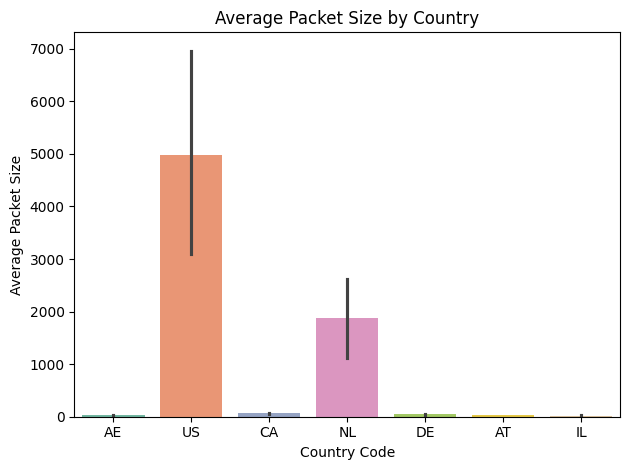

In [ ]:
sns.barplot(data=df,x='src_ip_country_code', y='avg_packet_size',palette='Set2')
plt.title('Average Packet Size by Country')
plt.xlabel('Country Code')
plt.ylabel('Average Packet Size')
plt.tight_layout()
plt.show()


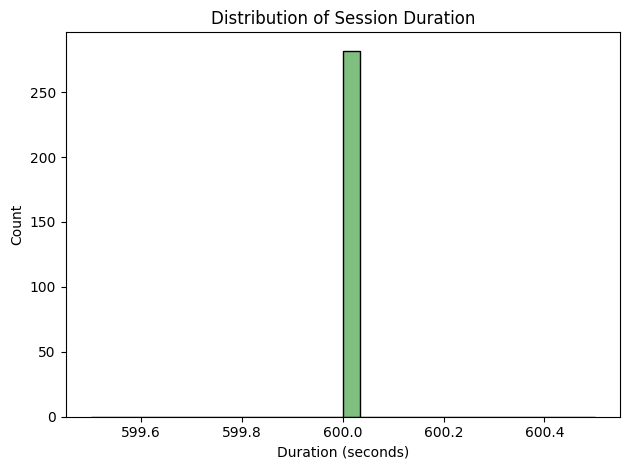

In [ ]:
sns.histplot(df['session_duration'], kde=True, bins=30, color='green')
plt.title('Distribution of Session Duration')
plt.xlabel('Duration (seconds)')
plt.tight_layout()
plt.show()


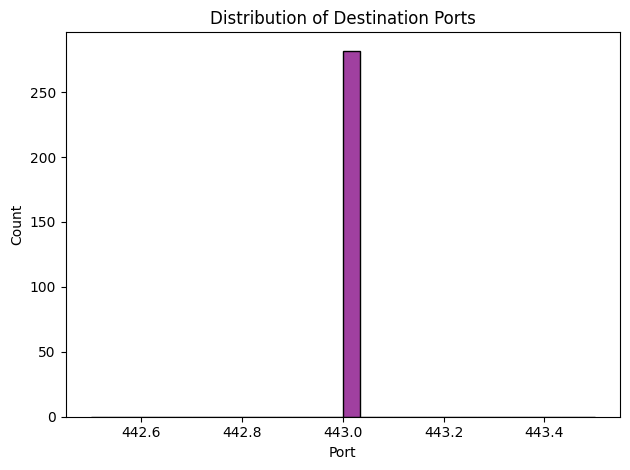

In [ ]:
sns.histplot(df['dst_port'], bins=30, color='purple')
plt.title('Distribution of Destination Ports')
plt.xlabel('Port')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [ ]:
df.head()


,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types,session_duration,avg_packet_size,hour_of_day
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,30.986667,23
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,81.830000,23
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,69.956667,23
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,74.706667,23
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,34.030000,23


In [ ]:
df['detection_types'].unique()

array(['waf_rule'], dtype=object)

In [ ]:
df['session_duration'].unique()

array([600.])

In [ ]:
df['source.name'].unique()

array(['prod_webserver'], dtype=object)

In [ ]:
df['source.meta'].unique()

array(['AWS_VPC_Flow'], dtype=object)

In [ ]:
df['observation_name'].unique()

array(['Adversary Infrastructure Interaction'], dtype=object)

In [ ]:
df['rule_names'].unique()

array(['Suspicious Web Traffic'], dtype=object)

In [ ]:
df['dst_ip'].unique()

array(['10.138.69.97'], dtype=object)

In [ ]:
df['dst_port'].unique()

array([443])

In [ ]:
df['response.code'].unique()

array([200])

In [ ]:
df['creation_time'].unique()

<DatetimeArray>
['2024-04-25 23:00:00+00:00', '2024-04-25 23:10:00+00:00',
 '2024-04-25 23:20:00+00:00', '2024-04-25 23:30:00+00:00',
 '2024-04-25 23:40:00+00:00', '2024-04-25 23:50:00+00:00',
 '2024-04-26 00:00:00+00:00', '2024-04-26 00:10:00+00:00',
 '2024-04-26 00:20:00+00:00', '2024-04-26 00:30:00+00:00',
 '2024-04-26 00:40:00+00:00', '2024-04-26 00:50:00+00:00',
 '2024-04-26 01:00:00+00:00', '2024-04-26 01:10:00+00:00',
 '2024-04-26 01:20:00+00:00', '2024-04-26 01:30:00+00:00',
 '2024-04-26 01:40:00+00:00', '2024-04-26 01:50:00+00:00',
 '2024-04-26 08:00:00+00:00', '2024-04-26 08:10:00+00:00',
 '2024-04-26 08:20:00+00:00', '2024-04-26 08:30:00+00:00',
 '2024-04-26 08:40:00+00:00', '2024-04-26 08:50:00+00:00',
 '2024-04-26 09:10:00+00:00', '2024-04-26 09:00:00+00:00',
 '2024-04-26 09:20:00+00:00', '2024-04-26 09:30:00+00:00',
 '2024-04-26 09:40:00+00:00', '2024-04-26 09:50:00+00:00']
Length: 30, dtype: datetime64[ns, UTC]

In [ ]:
df['end_time'].unique()

<DatetimeArray>
['2024-04-25 23:10:00+00:00', '2024-04-25 23:20:00+00:00',
 '2024-04-25 23:30:00+00:00', '2024-04-25 23:40:00+00:00',
 '2024-04-25 23:50:00+00:00', '2024-04-26 00:00:00+00:00',
 '2024-04-26 00:10:00+00:00', '2024-04-26 00:20:00+00:00',
 '2024-04-26 00:30:00+00:00', '2024-04-26 00:40:00+00:00',
 '2024-04-26 00:50:00+00:00', '2024-04-26 01:00:00+00:00',
 '2024-04-26 01:10:00+00:00', '2024-04-26 01:20:00+00:00',
 '2024-04-26 01:30:00+00:00', '2024-04-26 01:40:00+00:00',
 '2024-04-26 01:50:00+00:00', '2024-04-26 02:00:00+00:00',
 '2024-04-26 08:10:00+00:00', '2024-04-26 08:20:00+00:00',
 '2024-04-26 08:30:00+00:00', '2024-04-26 08:40:00+00:00',
 '2024-04-26 08:50:00+00:00', '2024-04-26 09:00:00+00:00',
 '2024-04-26 09:20:00+00:00', '2024-04-26 09:10:00+00:00',
 '2024-04-26 09:30:00+00:00', '2024-04-26 09:40:00+00:00',
 '2024-04-26 09:50:00+00:00', '2024-04-26 10:00:00+00:00']
Length: 30, dtype: datetime64[ns, UTC]

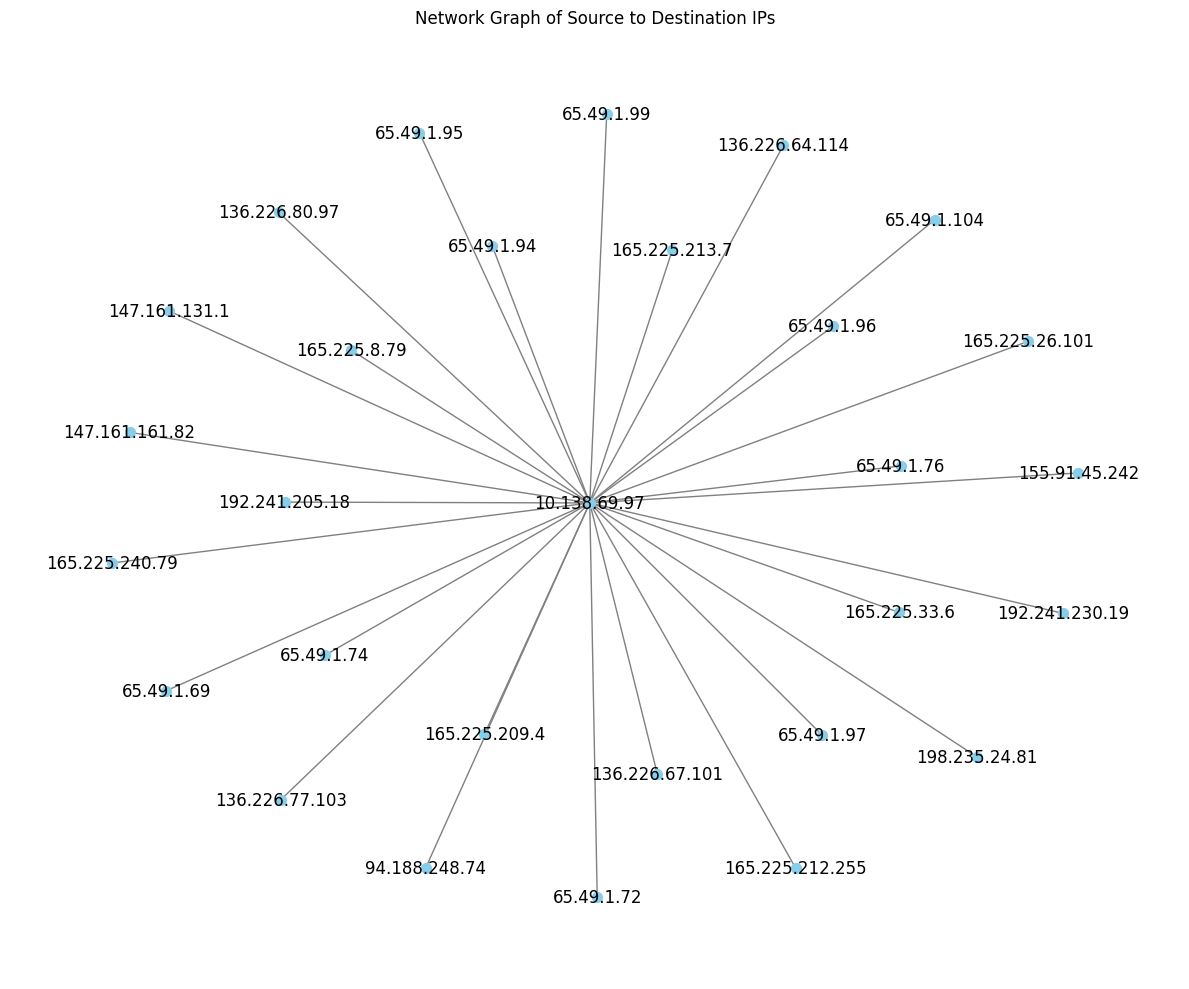

In [ ]:
import networkx as nx

G = nx.Graph()
for i, row in df.iterrows():
    G.add_edge(row['src_ip'], row['dst_ip'])

plt.figure(figsize=(12, 10))
nx.draw_networkx(G, node_color='skyblue', node_size=50, edge_color='gray', with_labels=True)
plt.title("Network Graph of Source to Destination IPs")
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
df.head()


,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types,session_duration,avg_packet_size,hour_of_day
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,30.986667,23
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,81.830000,23
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,69.956667,23
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,74.706667,23
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25 23:00:00+00:00,waf_rule,600.0,34.030000,23


Anamoly Detection


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Time of Day
df['hour_of_day'] = df['time'].dt.hour

# Interaction count per IP
ip_interaction_counts = df['src_ip'].value_counts()
df['interaction_count'] = df['src_ip'].map(ip_interaction_counts)

# Selecting features for modeling
features = df[['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size',
               'hour_of_day', 'interaction_count', 'src_ip_country_code']]

# Preprocessing: Scaling and One-Hot Encoding
# One-hot encode country codes, scaling the rest
numeric_features = ['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size',
                    'hour_of_day', 'interaction_count']
categorical_features = ['src_ip_country_code']
# Creating the transformer pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(sparse_output=False), categorical_features)
])
# Fit and transform the features
X_scaled = preprocessor.fit_transform(features)

# Get transformed column names
encoded_cat_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(encoded_cat_names)
# Creating the final DataFrame
df_features = pd.DataFrame(X_scaled, columns=all_feature_names, index=df.index)
# Show the first few rows
print(df_features.head())

   bytes_in  bytes_out  session_duration  avg_packet_size  hour_of_day  \
0 -0.288219  -0.281223               0.0        -0.287850     1.766389   
1 -0.282108  -0.260804               0.0        -0.280910     1.766389   
2 -0.282689  -0.279344               0.0        -0.282531     1.766389   
3 -0.282197  -0.276161               0.0        -0.281883     1.766389   
4 -0.287996  -0.277678               0.0        -0.287435     1.766389   

   interaction_count  src_ip_country_code_AE  src_ip_country_code_AT  \
0          -0.445092                     1.0                     0.0   
1          -0.936349                     0.0                     0.0   
2          -0.567907                     0.0                     0.0   
3          -0.813535                     0.0                     0.0   
4          -0.199464                     0.0                     0.0   

   src_ip_country_code_CA  src_ip_country_code_DE  src_ip_country_code_IL  \
0                     0.0                    

In [ ]:
df.columns

Index(['bytes_in', 'bytes_out', 'creation_time', 'end_time', 'src_ip',
       'src_ip_country_code', 'protocol', 'response.code', 'dst_port',
       'dst_ip', 'rule_names', 'observation_name', 'source.meta',
       'source.name', 'time', 'detection_types', 'session_duration',
       'avg_packet_size', 'hour_of_day', 'interaction_count'],
      dtype='object')

In [ ]:
from sklearn.ensemble import IsolationForest

features = df[['bytes_in', 'bytes_out', 'session_duration', 'avg_packet_size']]
model = IsolationForest(contamination=0.1, random_state=42)
df['anomaly'] = model.fit_predict(features)
df['anomaly'] = df['anomaly'].map({1: 'Normal', -1: 'Highly Suspicious'})


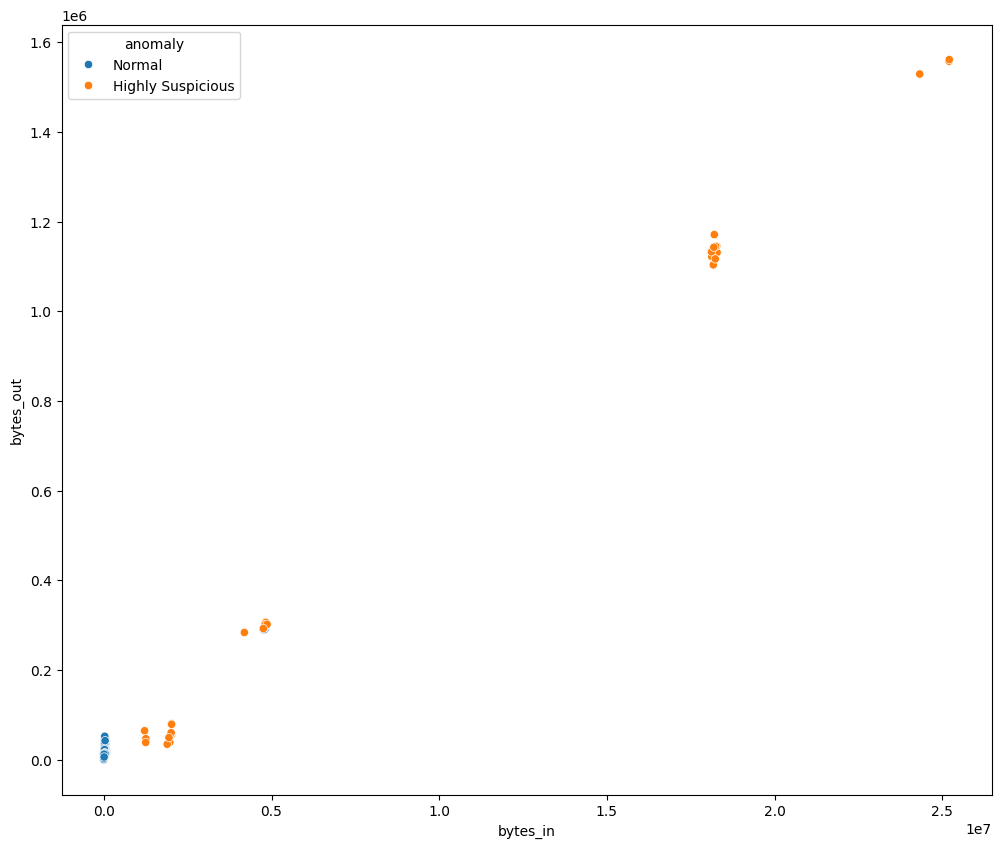

In [ ]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df, x='bytes_in', y='bytes_out', hue='anomaly')
plt.show()

<ipython-input-47-7f354fdcb3dd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suspicious_ips.values, y=top_suspicious_ips.index, palette='Reds_r')


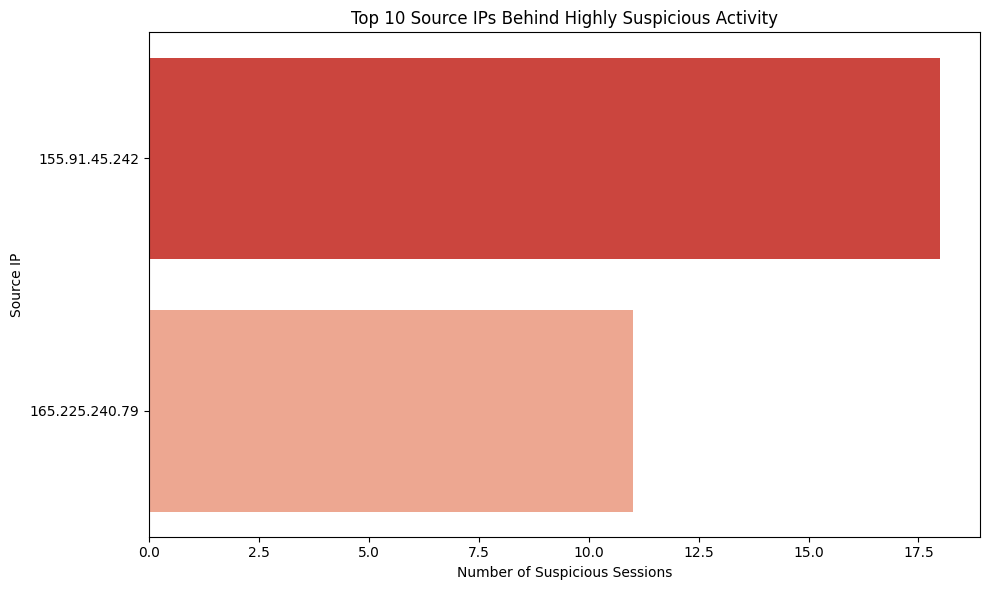

In [ ]:
top_suspicious_ips = df[df['anomaly'] == 'Highly Suspicious']['src_ip'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_suspicious_ips.values, y=top_suspicious_ips.index, palette='Reds_r')
plt.title("Top 10 Source IPs Behind Highly Suspicious Activity")
plt.xlabel("Number of Suspicious Sessions")
plt.ylabel("Source IP")
plt.tight_layout()
plt.show()


<ipython-input-48-2612ed6a5b54>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suspicious_countries.values, y=top_suspicious_countries.index, palette='coolwarm')


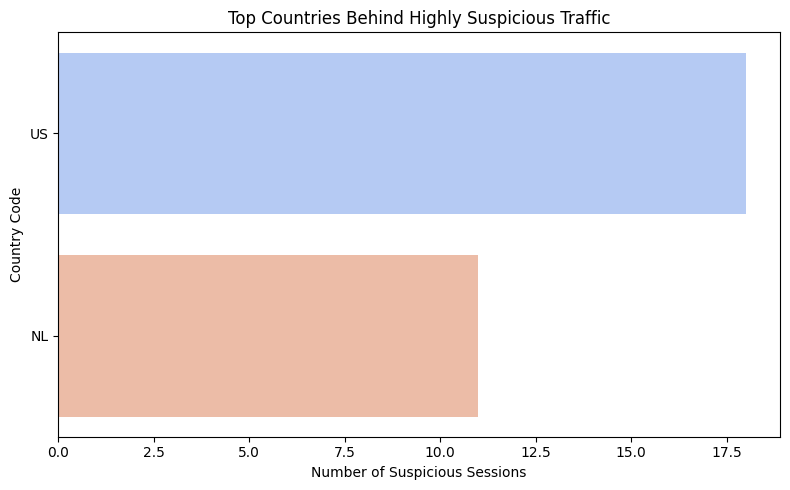

In [ ]:
top_suspicious_countries = df[df['anomaly'] == 'Highly Suspicious']['src_ip_country_code'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_suspicious_countries.values, y=top_suspicious_countries.index, palette='coolwarm')
plt.title("Top Countries Behind Highly Suspicious Traffic")
plt.xlabel("Number of Suspicious Sessions")
plt.ylabel("Country Code")
plt.tight_layout()
plt.show()


In [ ]:
# Country-based anomaly percentage
anomaly_country_pct = (
    df[df['anomaly'] == 'Highly Suspicious']['src_ip_country_code']
    .value_counts(normalize=True) * 100
).round(2)

print("🔢 Suspicious Traffic by Country (%):\n")
print(anomaly_country_pct)


🔢 Suspicious Traffic by Country (%):

src_ip_country_code
US    62.07
NL    37.93
Name: proportion, dtype: float64


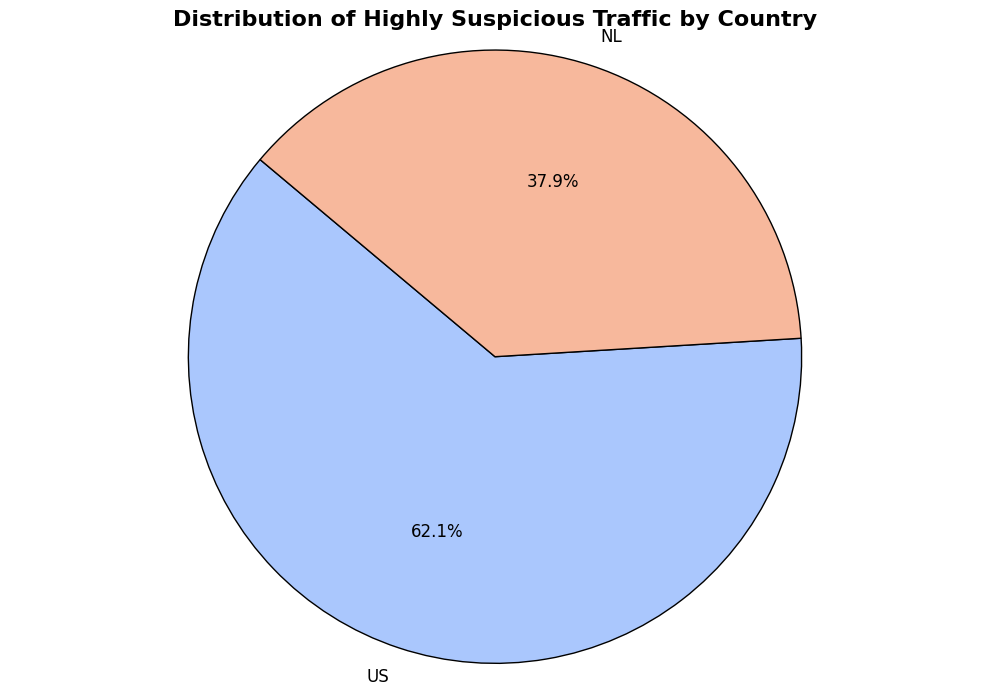

In [ ]:
# Create a Pie Chart for Suspicious Traffic by Country
plt.figure(figsize=(10, 7))
colors = sns.color_palette('coolwarm', len(anomaly_country_pct))

plt.pie(anomaly_country_pct,
        labels=anomaly_country_pct.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
        textprops={'fontsize': 12},
        wedgeprops={'edgecolor': 'black', 'linewidth': 1})

plt.title("Distribution of Highly Suspicious Traffic by Country", fontsize=16, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()
